In [4]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import tempfile
from pathlib import Path
from typing import Tuple, Optional
import pickle
import random
from tqdm import tqdm

## How to start

Install the required packages

In [2]:
# !pip install pretty_midi

Run this notebook preferably in an empty folder.

Download the dataset from here: http://hog.ee.columbia.edu/craffel/lmd/clean_midi.tar.gz and extract it in your current folder

Change the following string to match the path of your dataset folder (clean_midi):

In [3]:
clean_midi_path = r"C:/Users/tommy/Desktop/UNI/NN/project/clean_test/clean_midi"

## Select all MIDI files with a 4/4 time signature in the Dataset

In [4]:
def is_simple_meter(midi_file: str) -> bool:
    """
    Check if a MIDI file is in 4/4 time signature using pretty_midi.
    
    Args:
        midi_file (str): Path to the MIDI file
        
    Returns:
        bool: True if the song is in 4/4, False otherwise
    """
    try:
        # Load MIDI file with pretty_midi
        midi_data = pretty_midi.PrettyMIDI(midi_file)
        
        # Get time signatures
        time_sigs = midi_data.time_signature_changes
        
        # If no time signature specified, return False
        if not time_sigs:
            return False
            
        # Check each time signature change
        for ts in time_sigs:
            # If any time signature is not 4/4, return False
            if not (ts.numerator == 4 and ts.denominator == 4):
                return False
                
        return True
        
    except Exception as e:
        print(f"Error processing MIDI file: {e}")
        return False

In [5]:
def analyze_time_signatures(clean_midi_path: str, 
                          save_results: bool = True,
                          verbose: bool = False) -> list:
    """
    Analyze all MIDI files in directory for 4/4 time signature.
    Returns list of valid file paths and saves to pickle file.
    """
    
    valid_files = []
    
    # Get total file count first
    all_midi_files = []
    for author in os.listdir(clean_midi_path):
        author_path = os.path.join(clean_midi_path, author)
        if not os.path.isdir(author_path):
            continue
        midi_files = [os.path.join(author_path, f) 
                     for f in os.listdir(author_path) 
                     if f.lower().endswith('.mid')]
        all_midi_files.extend([(author, f) for f in midi_files])
    
    # Process all files with single progress bar
    for author, full_path in tqdm(all_midi_files, desc="Processing MIDI files"):
        try:
            if is_simple_meter(full_path):
                valid_files.append({
                    'path': full_path,
                    'author': author,
                    'song': os.path.basename(full_path)
                })
        except Exception as e:
            if verbose:
                print(f"Error processing {full_path}: {e}")
            continue
    
    # Print statistics
    print(f"\nTotal files analyzed: {len(all_midi_files)}")
    print(f"Files in 4/4: {len(valid_files)} ({len(valid_files)/len(all_midi_files)*100:.1f}%)")
    
    # Save results
    if save_results:
        with open('valid_midi_files.pickle', 'wb') as f:
            pickle.dump(valid_files, f)
        print(f"Results saved to valid_midi_files.pickle")
    
    return valid_files

In [6]:
valid_files = analyze_time_signatures(clean_midi_path, verbose=False)

Processing MIDI files:   0%|          | 1/17256 [00:00<37:37,  7.65it/s]c:\Users\tommy\anaconda3\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
Processing MIDI files:   0%|          | 7/17256 [00:01<1:05:34,  4.38it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   0%|          | 59/17256 [00:08<24:30, 11.69it/s] 

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   0%|          | 63/17256 [00:08<33:07,  8.65it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   1%|          | 136/17256 [00:20<20:35, 13.85it/s] 

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   1%|          | 149/17256 [00:21<24:24, 11.68it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   1%|          | 215/17256 [00:31<25:39, 11.07it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   2%|▏         | 261/17256 [00:37<30:18,  9.34it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   2%|▏         | 281/17256 [00:40<41:15,  6.86it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   2%|▏         | 287/17256 [00:41<36:33,  7.74it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   2%|▏         | 309/17256 [00:43<26:16, 10.75it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   2%|▏         | 410/17256 [00:55<28:45,  9.76it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   3%|▎         | 433/17256 [00:58<38:49,  7.22it/s]

Error processing MIDI file: 


Processing MIDI files:   4%|▍         | 652/17256 [01:22<21:26, 12.91it/s]

Error processing MIDI file: 


Processing MIDI files:   4%|▍         | 658/17256 [01:23<22:25, 12.34it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   4%|▍         | 724/17256 [01:32<31:27,  8.76it/s]  

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   5%|▍         | 783/17256 [01:37<15:17, 17.95it/s]

Error processing MIDI file: Could not decode key with 5 flats and mode 255


Processing MIDI files:   5%|▍         | 815/17256 [01:40<30:02,  9.12it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   5%|▍         | 827/17256 [01:41<34:14,  7.99it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   6%|▌         | 1044/17256 [02:11<32:35,  8.29it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   6%|▌         | 1076/17256 [02:15<24:46, 10.88it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   8%|▊         | 1378/17256 [02:44<17:35, 15.05it/s]  

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   8%|▊         | 1422/17256 [02:49<38:41,  6.82it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:   9%|▉         | 1615/17256 [03:10<22:09, 11.77it/s]

Error processing MIDI file: Could not decode key with 1 flats and mode 255


Processing MIDI files:   9%|▉         | 1630/17256 [03:12<31:29,  8.27it/s]

Error processing MIDI file: MIDI file has a largest tick of 12884927490, it is likely corrupt


Processing MIDI files:  10%|▉         | 1674/17256 [03:17<49:19,  5.26it/s]

Error processing MIDI file: Message length 2093056 exceeds maximum length 1000000


Processing MIDI files:  10%|▉         | 1690/17256 [03:19<29:43,  8.73it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  10%|█         | 1761/17256 [03:25<21:36, 11.95it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  11%|█         | 1922/17256 [03:43<17:46, 14.37it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  11%|█▏        | 1948/17256 [03:45<21:38, 11.79it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  12%|█▏        | 2013/17256 [03:52<25:18, 10.04it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  12%|█▏        | 2118/17256 [04:02<26:52,  9.39it/s]

Error processing MIDI file: MIDI file has a largest tick of 4312862115, it is likely corrupt


Processing MIDI files:  13%|█▎        | 2273/17256 [04:22<34:49,  7.17it/s]

Error processing MIDI file: 


Processing MIDI files:  14%|█▍        | 2431/17256 [04:42<22:49, 10.82it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  15%|█▌        | 2630/17256 [04:56<19:09, 12.73it/s]

Error processing MIDI file: 


Processing MIDI files:  17%|█▋        | 2850/17256 [05:19<19:16, 12.46it/s]

Error processing MIDI file: MIDI file has a largest tick of 33639950, it is likely corrupt


Processing MIDI files:  17%|█▋        | 2881/17256 [05:23<17:17, 13.86it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  17%|█▋        | 2966/17256 [05:34<27:24,  8.69it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  17%|█▋        | 2972/17256 [05:35<32:37,  7.30it/s]

Error processing MIDI file: 


Processing MIDI files:  17%|█▋        | 2996/17256 [05:38<22:34, 10.53it/s]

Error processing MIDI file: Could not decode key with 1 flats and mode 255


Processing MIDI files:  17%|█▋        | 3006/17256 [05:39<22:05, 10.75it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  18%|█▊        | 3034/17256 [05:43<26:56,  8.80it/s]

Error processing MIDI file: Could not decode key with 4 flats and mode 255
Error processing MIDI file: Could not decode key with 4 flats and mode 255


Processing MIDI files:  18%|█▊        | 3063/17256 [05:46<26:48,  8.83it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  18%|█▊        | 3065/17256 [05:46<33:28,  7.06it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  20%|█▉        | 3401/17256 [06:28<25:33,  9.04it/s]  

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  20%|█▉        | 3429/17256 [06:32<18:53, 12.20it/s]  

Error processing MIDI file: Could not decode key with 2 flats and mode 255
Error processing MIDI file: Could not decode key with 2 flats and mode 255


Processing MIDI files:  20%|██        | 3513/17256 [06:43<30:42,  7.46it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  20%|██        | 3519/17256 [06:44<38:50,  5.89it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  22%|██▏       | 3781/17256 [07:10<13:04, 17.17it/s]  

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  22%|██▏       | 3814/17256 [07:13<18:06, 12.38it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  23%|██▎       | 3942/17256 [07:27<19:00, 11.67it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  23%|██▎       | 3958/17256 [07:28<20:41, 10.71it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  23%|██▎       | 3997/17256 [07:32<17:00, 12.99it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  24%|██▍       | 4116/17256 [07:49<18:37, 11.76it/s]  

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  24%|██▍       | 4175/17256 [07:57<19:53, 10.96it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  24%|██▍       | 4184/17256 [07:58<25:57,  8.39it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  25%|██▍       | 4250/17256 [08:07<17:22, 12.48it/s]

Error processing MIDI file: Could not decode key with 4 flats and mode 255


Processing MIDI files:  25%|██▌       | 4322/17256 [08:15<16:34, 13.01it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  26%|██▌       | 4405/17256 [08:26<18:58, 11.29it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  26%|██▌       | 4521/17256 [08:39<21:28,  9.88it/s]

Error processing MIDI file: Could not decode key with 1 flats and mode 255


Processing MIDI files:  29%|██▉       | 5017/17256 [09:47<29:57,  6.81it/s]  

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  30%|██▉       | 5144/17256 [10:02<18:41, 10.80it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  30%|██▉       | 5164/17256 [10:04<25:00,  8.06it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  31%|███       | 5333/17256 [10:19<16:48, 11.82it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  31%|███       | 5342/17256 [10:20<18:41, 10.62it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  31%|███       | 5387/17256 [10:26<30:45,  6.43it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  31%|███▏      | 5412/17256 [10:28<09:38, 20.46it/s]

Error processing MIDI file: Could not decode key with 1 flats and mode 255


Processing MIDI files:  32%|███▏      | 5608/17256 [10:50<22:23,  8.67it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  33%|███▎      | 5711/17256 [11:03<16:50, 11.42it/s]

Error processing MIDI file: Could not decode key with 3 flats and mode 255


Processing MIDI files:  33%|███▎      | 5714/17256 [11:04<22:39,  8.49it/s]

Error processing MIDI file: Could not decode key with 5 flats and mode 255


Processing MIDI files:  35%|███▌      | 6051/17256 [11:42<17:50, 10.47it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  36%|███▌      | 6145/17256 [11:53<20:57,  8.84it/s]

Error processing MIDI file: 


Processing MIDI files:  36%|███▌      | 6164/17256 [11:55<23:56,  7.72it/s]

Error processing MIDI file: 


Processing MIDI files:  36%|███▌      | 6232/17256 [12:04<17:58, 10.22it/s]

Error processing MIDI file: 


Processing MIDI files:  37%|███▋      | 6326/17256 [12:17<13:16, 13.73it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  38%|███▊      | 6513/17256 [12:41<14:59, 11.94it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  38%|███▊      | 6614/17256 [12:53<15:58, 11.10it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  40%|████      | 6973/17256 [13:32<14:22, 11.92it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  40%|████      | 6985/17256 [13:33<15:31, 11.03it/s]

Error processing MIDI file: Could not decode key with 12 sharps and mode 95


Processing MIDI files:  41%|████▏     | 7134/17256 [13:51<19:22,  8.70it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  42%|████▏     | 7286/17256 [14:11<19:10,  8.67it/s]

Error processing MIDI file: Could not decode key with 5 flats and mode 2


Processing MIDI files:  42%|████▏     | 7293/17256 [14:12<21:17,  7.80it/s]

Error processing MIDI file: Message length 2093056 exceeds maximum length 1000000


Processing MIDI files:  42%|████▏     | 7321/17256 [14:15<14:19, 11.56it/s]

Error processing MIDI file: 


Processing MIDI files:  43%|████▎     | 7348/17256 [14:18<13:34, 12.16it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  43%|████▎     | 7351/17256 [14:18<13:32, 12.19it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  43%|████▎     | 7365/17256 [14:20<23:48,  6.92it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  43%|████▎     | 7379/17256 [14:22<17:11,  9.58it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  43%|████▎     | 7399/17256 [14:25<22:24,  7.33it/s]

Error processing MIDI file: 


Processing MIDI files:  43%|████▎     | 7483/17256 [14:37<23:04,  7.06it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  44%|████▎     | 7527/17256 [14:43<33:59,  4.77it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  44%|████▍     | 7577/17256 [14:49<16:09,  9.98it/s]

Error processing MIDI file: Could not decode key with 2 flats and mode 255


Processing MIDI files:  44%|████▍     | 7623/17256 [14:53<13:52, 11.57it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  45%|████▌     | 7825/17256 [15:17<21:47,  7.21it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  46%|████▌     | 7903/17256 [15:26<17:43,  8.80it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  46%|████▌     | 7925/17256 [15:28<15:17, 10.17it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  46%|████▋     | 7986/17256 [15:33<10:52, 14.21it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  46%|████▋     | 8000/17256 [15:34<08:44, 17.64it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  47%|████▋     | 8041/17256 [15:39<19:28,  7.89it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  47%|████▋     | 8054/17256 [15:42<23:36,  6.49it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  47%|████▋     | 8086/17256 [15:45<12:20, 12.39it/s]

Error processing MIDI file: Could not decode key with 1 flats and mode 255


Processing MIDI files:  48%|████▊     | 8307/17256 [16:11<15:03,  9.91it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  48%|████▊     | 8347/17256 [16:16<15:03,  9.86it/s]

Error processing MIDI file: MIDI file has a largest tick of 12027564, it is likely corrupt


Processing MIDI files:  49%|████▉     | 8416/17256 [16:24<21:04,  6.99it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  49%|████▉     | 8456/17256 [16:31<22:21,  6.56it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  49%|████▉     | 8504/17256 [16:37<14:54,  9.79it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  50%|████▉     | 8573/17256 [16:46<12:32, 11.54it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  50%|████▉     | 8598/17256 [16:49<21:09,  6.82it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  51%|█████     | 8743/17256 [17:05<12:11, 11.64it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  51%|█████     | 8777/17256 [17:09<12:21, 11.44it/s]

Error processing MIDI file: Message length 2093056 exceeds maximum length 1000000


Processing MIDI files:  51%|█████     | 8786/17256 [17:11<20:44,  6.80it/s]

Error processing MIDI file: Could not decode key with 2 flats and mode 255


Processing MIDI files:  52%|█████▏    | 8930/17256 [17:29<15:47,  8.79it/s]

Error processing MIDI file: Message length 2093056 exceeds maximum length 1000000


Processing MIDI files:  52%|█████▏    | 9005/17256 [17:40<12:48, 10.74it/s]

Error processing MIDI file: 


Processing MIDI files:  52%|█████▏    | 9043/17256 [17:44<12:56, 10.57it/s]

Error processing MIDI file: Could not decode key with 2 flats and mode 255


Processing MIDI files:  53%|█████▎    | 9150/17256 [17:58<19:02,  7.09it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  53%|█████▎    | 9199/17256 [18:02<15:28,  8.68it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  53%|█████▎    | 9223/17256 [18:04<08:17, 16.16it/s]

Error processing MIDI file: 


Processing MIDI files:  54%|█████▍    | 9323/17256 [18:15<19:03,  6.94it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  55%|█████▍    | 9422/17256 [18:26<18:07,  7.20it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  55%|█████▍    | 9486/17256 [18:35<15:20,  8.44it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  55%|█████▌    | 9524/17256 [18:41<17:59,  7.16it/s]

Error processing MIDI file: 


Processing MIDI files:  56%|█████▌    | 9648/17256 [19:01<18:57,  6.69it/s]

Error processing MIDI file: 


Processing MIDI files:  56%|█████▌    | 9660/17256 [19:02<12:46,  9.91it/s]

Error processing MIDI file: 
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  56%|█████▌    | 9689/17256 [19:07<20:52,  6.04it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  57%|█████▋    | 9845/17256 [19:29<12:21, 10.00it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  58%|█████▊    | 9985/17256 [19:44<06:40, 18.17it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  58%|█████▊    | 10087/17256 [19:54<11:57,  9.99it/s]

Error processing MIDI file: Could not decode key with 2 flats and mode 2


Processing MIDI files:  59%|█████▊    | 10107/17256 [19:56<09:31, 12.51it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  59%|█████▉    | 10173/17256 [20:03<17:50,  6.62it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  59%|█████▉    | 10190/17256 [20:05<12:46,  9.22it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  59%|█████▉    | 10208/17256 [20:08<12:32,  9.36it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  60%|█████▉    | 10289/17256 [20:18<12:43,  9.13it/s]

Error processing MIDI file: Could not decode key with 14 sharps and mode 78


Processing MIDI files:  60%|█████▉    | 10291/17256 [20:18<11:01, 10.54it/s]

Error processing MIDI file: running status without last_status


Processing MIDI files:  60%|█████▉    | 10300/17256 [20:19<07:54, 14.67it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  60%|█████▉    | 10308/17256 [20:19<07:19, 15.81it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: running status without last_status


Processing MIDI files:  60%|█████▉    | 10323/17256 [20:20<07:00, 16.50it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: no MTrk header at start of track
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  60%|█████▉    | 10333/17256 [20:21<08:15, 13.98it/s]

Error processing MIDI file: running status without last_status
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  60%|█████▉    | 10345/17256 [20:22<10:10, 11.32it/s]

Error processing MIDI file: running status without last_status


Processing MIDI files:  60%|██████    | 10367/17256 [20:23<05:15, 21.81it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: no MTrk header at start of track
Error processing MIDI file: running status without last_status
Error processing MIDI file: running status without last_status


Processing MIDI files:  60%|██████    | 10374/17256 [20:24<04:54, 23.40it/s]

Error processing MIDI file: running status without last_status
Error processing MIDI file: no MTrk header at start of track


Processing MIDI files:  60%|██████    | 10381/17256 [20:24<05:06, 22.42it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  60%|██████    | 10384/17256 [20:24<05:09, 22.21it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  60%|██████    | 10400/17256 [20:25<06:24, 17.82it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  60%|██████    | 10409/17256 [20:26<07:55, 14.40it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  60%|██████    | 10419/17256 [20:27<10:49, 10.53it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  60%|██████    | 10424/17256 [20:27<08:06, 14.06it/s]

Error processing MIDI file: no MTrk header at start of track


Processing MIDI files:  60%|██████    | 10428/17256 [20:27<08:41, 13.10it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  60%|██████    | 10432/17256 [20:28<08:34, 13.26it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  60%|██████    | 10438/17256 [20:28<08:51, 12.84it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  61%|██████    | 10502/17256 [20:37<09:56, 11.32it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  62%|██████▏   | 10756/17256 [21:10<07:02, 15.40it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  63%|██████▎   | 10906/17256 [21:27<12:47,  8.28it/s]

Error processing MIDI file: undefined status byte 0xf5


Processing MIDI files:  64%|██████▎   | 10984/17256 [21:40<15:02,  6.95it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  64%|██████▍   | 11007/17256 [21:43<10:52,  9.58it/s]

Error processing MIDI file: Could not decode key with 2 flats and mode 255


Processing MIDI files:  64%|██████▍   | 11039/17256 [21:46<07:46, 13.32it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  64%|██████▍   | 11069/17256 [21:49<06:35, 15.63it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  64%|██████▍   | 11079/17256 [21:50<11:13,  9.17it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  64%|██████▍   | 11084/17256 [21:51<11:40,  8.81it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  64%|██████▍   | 11101/17256 [21:53<10:14, 10.02it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  64%|██████▍   | 11120/17256 [21:55<07:32, 13.56it/s]

Error processing MIDI file: 


Processing MIDI files:  65%|██████▍   | 11139/17256 [21:57<08:31, 11.95it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  65%|██████▌   | 11233/17256 [22:10<09:28, 10.59it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  68%|██████▊   | 11754/17256 [23:10<06:00, 15.26it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  68%|██████▊   | 11767/17256 [23:11<04:57, 18.43it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  68%|██████▊   | 11778/17256 [23:12<06:43, 13.59it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  68%|██████▊   | 11786/17256 [23:13<09:26,  9.65it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  69%|██████▉   | 11881/17256 [23:25<08:04, 11.09it/s]

Error processing MIDI file: Could not decode key with 1 flats and mode 255


Processing MIDI files:  69%|██████▉   | 11900/17256 [23:27<08:32, 10.45it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  69%|██████▉   | 11975/17256 [23:35<11:12,  7.85it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  69%|██████▉   | 11992/17256 [23:37<07:36, 11.54it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  70%|██████▉   | 12005/17256 [23:40<14:50,  5.89it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  71%|███████   | 12169/17256 [24:00<10:13,  8.29it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  71%|███████   | 12187/17256 [24:02<07:32, 11.20it/s]

Error processing MIDI file: MIDI file has a largest tick of 4295115785, it is likely corrupt


Processing MIDI files:  71%|███████   | 12236/17256 [24:09<08:49,  9.49it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  72%|███████▏  | 12345/17256 [24:21<07:53, 10.37it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  72%|███████▏  | 12414/17256 [24:32<09:07,  8.85it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  72%|███████▏  | 12458/17256 [24:36<06:33, 12.18it/s]

Error processing MIDI file: MIDI file has a largest tick of 4295053573, it is likely corrupt


Processing MIDI files:  73%|███████▎  | 12527/17256 [24:43<07:21, 10.71it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  73%|███████▎  | 12562/17256 [24:47<07:49, 10.00it/s]

Error processing MIDI file: Could not decode key with 0 flats and mode 2


Processing MIDI files:  73%|███████▎  | 12614/17256 [24:53<05:23, 14.34it/s]

Error processing MIDI file: Could not decode key with 1 flats and mode 255


Processing MIDI files:  73%|███████▎  | 12621/17256 [24:54<05:59, 12.89it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  73%|███████▎  | 12644/17256 [24:56<06:51, 11.20it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  74%|███████▎  | 12713/17256 [25:03<08:53,  8.52it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  74%|███████▍  | 12758/17256 [25:09<07:41,  9.76it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  74%|███████▍  | 12803/17256 [25:15<10:37,  6.98it/s]

Error processing MIDI file: 


Processing MIDI files:  75%|███████▍  | 12902/17256 [25:24<04:49, 15.02it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  75%|███████▌  | 12956/17256 [25:31<07:22,  9.71it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  75%|███████▌  | 13000/17256 [25:35<04:39, 15.23it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  76%|███████▌  | 13048/17256 [25:39<04:35, 15.30it/s]

Error processing MIDI file: MIDI file has a largest tick of 25433089, it is likely corrupt


Processing MIDI files:  76%|███████▌  | 13143/17256 [25:48<04:30, 15.19it/s]

Error processing MIDI file: Could not decode key with 15 sharps and mode 66


Processing MIDI files:  77%|███████▋  | 13331/17256 [26:11<07:00,  9.34it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  78%|███████▊  | 13432/17256 [26:27<07:09,  8.90it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  78%|███████▊  | 13473/17256 [26:33<08:41,  7.26it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  78%|███████▊  | 13530/17256 [26:41<05:15, 11.80it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  78%|███████▊  | 13535/17256 [26:41<04:15, 14.54it/s]

Error processing MIDI file: no MTrk header at start of track


Processing MIDI files:  79%|███████▉  | 13645/17256 [26:55<05:54, 10.19it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  79%|███████▉  | 13706/17256 [27:03<07:48,  7.57it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  80%|███████▉  | 13744/17256 [27:08<06:11,  9.46it/s]

Error processing MIDI file: 


Processing MIDI files:  80%|███████▉  | 13750/17256 [27:08<05:24, 10.81it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  81%|████████  | 13909/17256 [27:29<05:58,  9.35it/s]

Error processing MIDI file: Could not decode key with 2 flats and mode 163


Processing MIDI files:  81%|████████▏ | 14028/17256 [27:43<04:35, 11.71it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  81%|████████▏ | 14041/17256 [27:45<05:40,  9.44it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  82%|████████▏ | 14120/17256 [27:53<04:31, 11.54it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  83%|████████▎ | 14260/17256 [28:04<03:04, 16.27it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  83%|████████▎ | 14273/17256 [28:05<03:33, 13.94it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  83%|████████▎ | 14290/17256 [28:06<03:47, 13.04it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  84%|████████▍ | 14513/17256 [28:24<02:44, 16.63it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  85%|████████▍ | 14610/17256 [28:31<03:33, 12.38it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  85%|████████▍ | 14628/17256 [28:33<03:33, 12.33it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  86%|████████▌ | 14778/17256 [28:46<03:25, 12.08it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  86%|████████▋ | 14885/17256 [28:54<04:24,  8.98it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  87%|████████▋ | 15010/17256 [29:08<03:58,  9.44it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  87%|████████▋ | 15056/17256 [29:15<04:14,  8.66it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  88%|████████▊ | 15178/17256 [29:30<02:50, 12.21it/s]

Error processing MIDI file: 


Processing MIDI files:  88%|████████▊ | 15196/17256 [29:32<02:48, 12.26it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  88%|████████▊ | 15253/17256 [29:37<03:05, 10.79it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  88%|████████▊ | 15260/17256 [29:38<02:54, 11.46it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  89%|████████▉ | 15341/17256 [29:48<03:38,  8.75it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  89%|████████▉ | 15342/17256 [29:48<04:04,  7.83it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  90%|████████▉ | 15466/17256 [30:02<04:14,  7.03it/s]

Error processing MIDI file: MIDI file has a largest tick of 196929468, it is likely corrupt


Processing MIDI files:  90%|████████▉ | 15474/17256 [30:03<03:17,  9.03it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  90%|████████▉ | 15488/17256 [30:04<03:02,  9.68it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  90%|████████▉ | 15500/17256 [30:05<02:20, 12.52it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  90%|█████████ | 15560/17256 [30:13<03:18,  8.56it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  90%|█████████ | 15577/17256 [30:15<03:57,  7.07it/s]

Error processing MIDI file: Message length 2093056 exceeds maximum length 1000000


Processing MIDI files:  90%|█████████ | 15616/17256 [30:20<03:22,  8.11it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  91%|█████████ | 15626/17256 [30:22<04:08,  6.57it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  91%|█████████▏| 15757/17256 [30:39<03:22,  7.41it/s]

Error processing MIDI file: 


Processing MIDI files:  92%|█████████▏| 15825/17256 [30:47<02:19, 10.28it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  92%|█████████▏| 15879/17256 [30:53<01:44, 13.12it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  93%|█████████▎| 16018/17256 [31:09<01:41, 12.20it/s]

Error processing MIDI file: Could not decode key with 11 sharps and mode 227


Processing MIDI files:  93%|█████████▎| 16031/17256 [31:10<01:26, 14.18it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file
Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  93%|█████████▎| 16112/17256 [31:19<01:44, 10.91it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  94%|█████████▍| 16191/17256 [31:27<01:43, 10.33it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  94%|█████████▍| 16225/17256 [31:32<02:03,  8.35it/s]

Error processing MIDI file: Could not decode key with 3 flats and mode 255


Processing MIDI files:  95%|█████████▍| 16324/17256 [31:45<02:02,  7.60it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  95%|█████████▌| 16448/17256 [32:02<01:21,  9.88it/s]

Error processing MIDI file: MThd not found. Probably not a MIDI file


Processing MIDI files:  95%|█████████▌| 16456/17256 [32:04<02:23,  5.57it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  96%|█████████▌| 16487/17256 [32:08<01:35,  8.08it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  96%|█████████▌| 16511/17256 [32:11<01:31,  8.15it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  96%|█████████▌| 16547/17256 [32:15<01:23,  8.47it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  96%|█████████▌| 16558/17256 [32:16<00:59, 11.74it/s]

Error processing MIDI file: 


Processing MIDI files:  96%|█████████▌| 16563/17256 [32:16<00:58, 11.93it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  96%|█████████▋| 16616/17256 [32:23<01:04,  9.91it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  97%|█████████▋| 16756/17256 [32:40<01:09,  7.19it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  98%|█████████▊| 16827/17256 [32:49<00:48,  8.93it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  98%|█████████▊| 16843/17256 [32:51<00:46,  8.83it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  98%|█████████▊| 16930/17256 [33:03<00:56,  5.82it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  98%|█████████▊| 16968/17256 [33:08<00:35,  8.01it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  98%|█████████▊| 16990/17256 [33:11<00:25, 10.56it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  98%|█████████▊| 16996/17256 [33:11<00:15, 16.55it/s]

Error processing MIDI file: data byte must be in range 0..127
Error processing MIDI file: running status without last_status
Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files:  99%|█████████▊| 17003/17256 [33:12<00:22, 11.24it/s]

Error processing MIDI file: data byte must be in range 0..127


Processing MIDI files: 100%|██████████| 17256/17256 [33:46<00:00,  8.52it/s]


Total files analyzed: 17256
Files in 4/4: 13458 (78.0%)
Results saved to valid_midi_files.pickle


Check how many files were selected

In [7]:
def analyze_dataset_stats(pickle_path: str,
                         base_dir: str,
                         file_ext: str = '.mid',
                         name_pattern: str = None) -> dict:
    """
    Compare pickle list length with total files in directory.
    
    Args:
        pickle_path: Path to pickle file containing filtered list
        base_dir: Root directory containing all files
        file_ext: File extension to count (default: '.mid')
        name_pattern: Optional regex pattern for file names
    
    Returns:
        dict: Statistics including total files, filtered files, percentage
    """
    
    # Load filtered files list
    with open(pickle_path, 'rb') as f:
        filtered_files = pickle.load(f)
    
    # Count total matching files
    total_files = 0
    for root, _, files in os.walk(base_dir):
        if name_pattern:
            files = [f for f in files if re.search(name_pattern, f)]
        matching_files = [f for f in files if f.lower().endswith(file_ext)]
        total_files += len(matching_files)
    
    # Calculate statistics
    stats = {
        'total_files': total_files,
        'filtered_files': len(filtered_files),
        'percentage': (len(filtered_files)/total_files*100 if total_files > 0 else 0)
    }
    
    # Print results
    print(f"Dataset Statistics:")
    print(f"Total files: {stats['total_files']}")
    print(f"Filtered files: {stats['filtered_files']}")
    print(f"Percentage: {stats['percentage']:.1f}%")
    
    return stats

In [8]:
stats_44 = analyze_dataset_stats('valid_midi_files.pickle', clean_midi_path)

Dataset Statistics:
Total files: 17256
Filtered files: 13458
Percentage: 78.0%


## Select all MIDI files with valid melody and chord tracks

The code processes MIDI files using a two-step approach:

1. **Melody Track Detection:**

    - Uses track names to identify melody/vocal tracks
    - Looks for keywords like "vocal", "lead", "melody", "voice", "sing"
    - Excludes backup vocals using patterns like "backup", "bgv"
2. **Chord Track Detection:**

    - Analyzes each non-melody track for chord patterns
    - Looks for groups of 3-4 notes played simultaneously
    - Calculates chord density (amount of three/four-note combinations)
    - Selects track with highest density of valid chords
    - Requires minimum chord density threshold

In [9]:
def get_melody_track_by_name(midi_file: str, verbose: bool = False) -> Optional[int]:
    """Find melody track index based on track names."""
    melody_patterns = [
        r'vocal(?!.*back)',  # Vocals but not backup vocals
        r'\b(lead)\b',       # Lead
        r'melody',           # Melody
        r'\b(voice)\b',      # Voice
        r'sing',            # Sing
        r'vocals(?!.*back)'  # Explicit vocals pattern (not backup)
    ]
    
    exclude_patterns = [
        r'backup.*vocal',
        r'back.*vocal',
        r'bgv',
        r'backing.*vox',
        r'oohs'
    ]
    
    midi_data = pretty_midi.PrettyMIDI(midi_file)
    
    if verbose:
        print("Available tracks:")
        for i, instrument in enumerate(midi_data.instruments):
            print(f"Track {i}: {instrument.name}")
    
    for i, instrument in enumerate(midi_data.instruments):
        if not instrument.name:
            continue
            
        name = instrument.name.lower()
        if verbose:
            print(f"Checking track {i}: {name}")
        
        if any(re.search(pattern, name) for pattern in exclude_patterns):
            if verbose:
                print(f"Skipping backup vocal track: {name}")
            continue
        
        for pattern in melody_patterns:
            if re.search(pattern, name):
                if verbose:
                    print(f"Found match: {pattern} in {name}")
                return i
    
    if verbose:
        print("No melody track found")
    return None

def get_chord_track(midi_file: str,
                   melody_idx: Optional[int] = None,
                   min_density: float = 0.3,
                   verbose: bool = False) -> Optional[int]:
    """Find track with highest density of three or four-note chords."""
    midi_data = pretty_midi.PrettyMIDI(midi_file)
    best_score = 0.0
    best_idx = None
    
    for i, track in enumerate(midi_data.instruments):
        if track.is_drum or i == melody_idx or not track.notes:
            continue
            
        chord_times = {}
        for note in track.notes:
            start = round(note.start, 2)
            if start not in chord_times:
                chord_times[start] = {'notes': [], 'duration': note.end - note.start}
            else:
                chord_times[start]['duration'] = max(chord_times[start]['duration'], 
                                                   note.end - note.start)
            chord_times[start]['notes'].append(note.pitch)
        
        total_chord_time = sum(data['duration'] 
                             for data in chord_times.values() 
                             if len(data['notes']) in [3, 4])
        
        track_duration = track.notes[-1].end - track.notes[0].start
        density = total_chord_time / track_duration if track_duration > 0 else 0.0
        
        if verbose:
            print(f"Track {i}: {total_chord_time:.2f}s of chords, density: {density:.2f}")
        
        if density > best_score:
            best_score = density
            best_idx = i
    
    if best_score < min_density:
        if verbose:
            print("No chord track found")
        return None
        
    if verbose and best_idx is not None:
        print(f"Selected chord track {best_idx}")
    
    return best_idx

In [10]:
def find_melody_chord_files(pickle_path: str = 'valid_midi_files.pickle',
                          verbose: bool = True) -> tuple:
    """
    Check files from pickle for melody and chord tracks.
    Returns tuple of (valid files list, track indices list).
    """
    
    # Load valid 4/4 files
    with open(pickle_path, 'rb') as f:
        midi_files = pickle.load(f)
    
    valid_files = []
    track_indices = []
    total = len(midi_files)
    
    # Process each file
    for midi_file in tqdm(midi_files, desc="Analyzing files"):
        try:
            # Check for melody and chord tracks
            melody_idx = get_melody_track_by_name(midi_file['path'], verbose=False)
            if melody_idx is not None:
                chord_idx = get_chord_track(midi_file['path'], melody_idx, verbose=False)
                if chord_idx is not None:
                    valid_files.append(midi_file)
                    track_indices.append({
                        'path': midi_file['path'],
                        'melody_idx': melody_idx,
                        'chord_idx': chord_idx
                    })
        except Exception as e:
            if verbose:
                print(f"Error processing {midi_file['path']}: {e}")
            continue
    
    # Save results
    with open('melody_chord_files.pickle', 'wb') as f:
        pickle.dump(valid_files, f)
    
    with open('track_indices.pickle', 'wb') as f:
        pickle.dump(track_indices, f)
    
    # Print statistics
    if verbose:
        print(f"\nTotal files analyzed: {total}")
        print(f"Files with melody and chords: {len(valid_files)}")
        print(f"Success rate: {len(valid_files)/total*100:.1f}%")
        print("Results saved to melody_chord_files.pickle and track_indices.pickle")
    
    return valid_files, track_indices

In [11]:
valid_files, track_indices = find_melody_chord_files()

Analyzing files: 100%|██████████| 13458/13458 [36:54<00:00,  6.08it/s] 



Total files analyzed: 13458
Files with melody and chords: 2895
Success rate: 21.5%
Results saved to melody_chord_files.pickle and track_indices.pickle


## Export 8-Bar MIDI Segments with Melody and One Chord Per Bar

1. **Chord Analysis**
   - Define all possible major/minor triads (C-B)
   - For each bar, analyze simultaneous notes
   - Identify most prominent triad as the bar's chord
   - Convert chord to 13-bit vector encoding

2. **Segment Creation**
   - Split song into 8-bar chunks
   - Extract melody notes within segment
   - Verify chord progression (one chord per bar)
   - Create clean MIDI with isolated melody and chords

3. **Data Storage**
   - Save segmented MIDI files
   - Store chord vectors as numpy arrays
   - Preserve original timing and bar structure

In [12]:
def process_songs_to_segments(melody_chord_pickle: str = 'melody_chord_files.pickle',
                            indices_pickle: str = 'track_indices.pickle',
                            output_dir: str = 'chord_segments',
                            matrix_dir: str = 'matrix_data_only_chords') -> dict:
    """Process songs into 8-bar segments and save chord matrices."""
    
    def get_basic_triads():
        """Generate major and minor triads."""
        triads = {}
        for root in range(12):
            major = {(root + i) % 12 for i in [0, 4, 7]}
            triads[f'{root}_major'] = major
            minor = {(root + i) % 12 for i in [0, 3, 7]}
            triads[f'{root}_minor'] = minor
        return triads
    
    def chord_to_vector(chord_name):
        """Convert chord name to one-hot vector."""
        root, quality = chord_name.split('_')
        root = int(root)
        vector = np.zeros(13)
        if quality == 'major':
            vector[root] = 1  # C=0 to B=11
        else:  # minor
            minor_map = {9:0, 10:1, 11:2, 0:3, 1:4, 2:5, 
                        3:6, 4:7, 5:8, 6:9, 7:10, 8:11}
            vector[minor_map[root]] = 1
            vector[12] = 1  # Minor flag
        return vector
    
    def identify_chord(notes, triads):
        """Find if notes contain a basic triad."""
        pitch_classes = {note % 12 for note in notes}
        for name, triad in triads.items():
            if triad.issubset(pitch_classes):
                return name
        return None
    
    def analyze_bar(notes, bar_start, bar_end, triads):
        """Analyze notes within bar boundaries for single chord."""
        note_groups = {}
        for note in notes:
            if bar_start <= note.start < bar_end:
                group_time = round(note.start, 3)
                if group_time not in note_groups:
                    note_groups[group_time] = []
                note_groups[group_time].append(note.pitch)
        
        found_chords = set()
        for group in note_groups.values():
            if len(group) >= 3:
                chord = identify_chord(group, triads)
                if chord:
                    found_chords.add(chord)
        
        return list(found_chords)[0] if len(found_chords) == 1 else None
    
    def process_segment(midi_data, melody_track, chord_track, downbeats, start_idx, triads):
        """Process segment and create chord vectors."""
        if start_idx + 8 >= len(downbeats):
            return None, None, None
        
        # Get bar boundaries
        bar_starts = downbeats[start_idx:start_idx + 8]
        bar_ends = downbeats[start_idx + 1:start_idx + 9]
        segment_start = bar_starts[0]
        segment_end = bar_ends[-1]
        bar_duration = bar_ends[0] - bar_starts[0]
        
        # Analyze bars and create vectors
        chord_progression = []
        chord_vectors = []
        for bar_start, bar_end in zip(bar_starts, bar_ends):
            chord = analyze_bar(chord_track.notes, bar_start, bar_end, triads)
            if not chord:
                return None, None, None
            chord_progression.append(chord)
            chord_vectors.append(chord_to_vector(chord))
        
        # Create segment
        segment = pretty_midi.PrettyMIDI(initial_tempo=midi_data.estimate_tempo())
        
        # Add melody
        clean_melody = pretty_midi.Instrument(program=melody_track.program)
        for note in melody_track.notes:
            if segment_start <= note.start < segment_end:
                clean_melody.notes.append(pretty_midi.Note(
                    velocity=note.velocity,
                    pitch=note.pitch,
                    start=note.start - segment_start,
                    end=min(note.end - segment_start, segment_end - segment_start)
                ))
        segment.instruments.append(clean_melody)
        
        # Add chords
        clean_chords = pretty_midi.Instrument(program=0)
        for bar, chord_name in enumerate(chord_progression):
            root, quality = chord_name.split('_')
            root = int(root)
            intervals = [0, 4, 7] if quality == 'major' else [0, 3, 7]
            
            for interval in intervals:
                note = pretty_midi.Note(
                    velocity=100,
                    pitch=48 + root + interval,  # C3 base
                    start=bar * bar_duration,
                    end=(bar + 1) * bar_duration
                )
                clean_chords.notes.append(note)
        
        segment.instruments.append(clean_chords)
        return segment, chord_progression, np.array(chord_vectors)
    
    # Main processing
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(matrix_dir, exist_ok=True)
    triads = get_basic_triads()
    stats = {'total_files': 0, 'segments_found': 0}
    
    with open(melody_chord_pickle, 'rb') as f:
        valid_files = pickle.load(f)
    with open(indices_pickle, 'rb') as f:
        track_indices = pickle.load(f)
    
    for file_info, track_info in tqdm(zip(valid_files, track_indices)):
        try:
            midi_data = pretty_midi.PrettyMIDI(track_info['path'])
            melody_track = midi_data.instruments[track_info['melody_idx']]
            chord_track = midi_data.instruments[track_info['chord_idx']]
            
            downbeats = midi_data.get_downbeats()
            segment_num = 0
            
            for start_idx in range(0, len(downbeats) - 8, 8):
                segment, chords, vectors = process_segment(
                    midi_data, melody_track, chord_track,
                    downbeats, start_idx, triads
                )
                
                if segment and vectors is not None:
                    base_name = os.path.splitext(os.path.basename(file_info['path']))[0]
                    # Save MIDI
                    out_path = os.path.join(
                        output_dir,
                        f"{base_name}_segment{segment_num}.mid"
                    )
                    segment.write(out_path)
                    
                    # Save chord vectors
                    matrix_path = os.path.join(
                        matrix_dir,
                        f"{base_name}_segment{segment_num}_chords.npy"
                    )
                    np.save(matrix_path, vectors)
                    
                    stats['segments_found'] += 1
                    segment_num += 1
            
            stats['total_files'] += 1
            
        except Exception as e:
            print(f"Error processing {file_info['path']}: {e}")
            continue
    
    print(f"\nProcessing complete:")
    print(f"Files processed: {stats['total_files']}")
    print(f"Valid segments found: {stats['segments_found']}")
    print(f"Average segments per file: {stats['segments_found']/stats['total_files']:.1f}")
    
    return stats

In [13]:
stats = process_songs_to_segments()

2895it [06:51,  7.04it/s]


Processing complete:
Files processed: 2895
Valid segments found: 1691
Average segments per file: 0.6


## Convert MIDI melody segments into matrices (Piano Rolls)

This function transforms 8-bar MIDI segments into a piano-roll matrix representation (128x128). The melody track is mapped to a binary matrix where:
- Rows represent MIDI pitches (0-127)
- Columns represent time steps (16 per bar × 8 bars = 128 steps)
- Each note is aligned to the nearest time step using chord onsets as bar markers

In [14]:
def convert_segments_to_matrices(
    segments_dir: str = 'chord_segments',
    output_dir: str = 'matrix_data'
) -> dict:
    """Convert MIDI segments to melody matrices using chord timing."""
    os.makedirs(output_dir, exist_ok=True)
    stats = {'processed': 0, 'success': 0}
    
    def get_bar_starts(chord_track):
        """Get start times of each bar from chord track."""
        # Get unique start times of chord notes
        starts = sorted(set(note.start for note in chord_track.notes))
        return starts[:8]  # 8 bars per segment
    
    def create_melody_matrix(melody_notes, bar_starts):
        """Map melody notes to grid with nearest time step alignment."""
        matrix = np.zeros((128, 128))
        bar_duration = bar_starts[1] - bar_starts[0]
        steps_per_bar = 16
        step_duration = bar_duration / steps_per_bar
        
        for note in melody_notes:
            # Find start bar and position
            start_bar = -1
            for i, bar_start in enumerate(bar_starts):
                # Check if note starts near this bar
                if abs(note.start - bar_start) < step_duration/2:
                    # Note starts very close to bar start
                    start_bar = i
                    rel_start = 0
                    break
                elif bar_start <= note.start < bar_start + bar_duration:
                    # Note starts within bar
                    start_bar = i
                    # Round to nearest step
                    steps_from_start = round((note.start - bar_start) / step_duration)
                    rel_start = steps_from_start / steps_per_bar
                    break
            if start_bar == -1:
                continue
                
            # Find end bar and position
            end_bar = -1
            for i, bar_start in enumerate(bar_starts):
                next_bar_start = bar_starts[i+1] if i < 7 else bar_start + bar_duration
                if abs(note.end - next_bar_start) < step_duration/2:
                    # Note ends very close to next bar
                    end_bar = i
                    rel_end = 1.0
                    break
                elif bar_start <= note.end < next_bar_start:
                    # Note ends within bar
                    end_bar = i
                    # Round to nearest step
                    steps_from_start = round((note.end - bar_start) / step_duration)
                    rel_end = min(steps_from_start / steps_per_bar, 1.0)
                    break
            if end_bar == -1:
                end_bar = 7
                rel_end = 1.0
            
            # Fill matrix for each spanned bar
            for bar in range(start_bar, end_bar + 1):
                if bar == start_bar:
                    start_step = bar * 16 + int(rel_start * 16)
                else:
                    start_step = bar * 16
                    
                if bar == end_bar:
                    end_step = bar * 16 + int(rel_end * 16)
                else:
                    end_step = (bar + 1) * 16
                    
                if start_step < end_step:
                    matrix[note.pitch, start_step:end_step] = 1
        
        return matrix
    
    midi_files = [f for f in os.listdir(segments_dir) if f.endswith('.mid')]
    
    for file in tqdm(midi_files, desc="Converting segments"):
        try:
            midi_path = os.path.join(segments_dir, file)
            midi_data = pretty_midi.PrettyMIDI(midi_path)
            
            if len(midi_data.instruments) < 2:
                continue
            
            melody_track = midi_data.instruments[0]
            chord_track = midi_data.instruments[1]
            
            # Get bar start times from chord track
            bar_starts = get_bar_starts(chord_track)
            if len(bar_starts) < 8:
                continue
            
            # Create melody matrix
            melody_matrix = create_melody_matrix(melody_track.notes, bar_starts)
            
            # Save melody matrix
            base_name = os.path.splitext(file)[0]
            np.save(os.path.join(output_dir, f"{base_name}_melody.npy"), melody_matrix)
            stats['success'] += 1
            stats['processed'] += 1
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
            continue
    
    print(f"\nConversion complete:")
    print(f"Files processed: {stats['processed']}")
    print(f"Successfully converted: {stats['success']}")
    
    return stats

In [15]:
stats = convert_segments_to_matrices()

Converting segments: 100%|██████████| 1683/1683 [00:06<00:00, 269.29it/s]


Conversion complete:
Files processed: 1429
Successfully converted: 1429


## Visualize piano roll

In [16]:
def visualize_melody_matrix(matrix_path: str) -> None:
    """
    Visualize a 128x128 melody matrix showing note occurrences.
    
    Args:
        matrix_path: Path to .npy file containing melody matrix
    """
    
    # Load matrix
    melody_matrix = np.load(matrix_path)
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Display matrix with inverted y-axis
    plt.imshow(melody_matrix, 
              cmap='RdPu',  # Red-Purple colormap
              aspect='equal',
              interpolation='nearest',
              origin='lower')  # Invert y-axis
    
    # Add labels
    plt.xlabel('Time steps (16 per bar)')
    plt.ylabel('MIDI pitch (high to low)')
    plt.title('Melody Matrix Visualization')
    
    # Show grid for bar boundaries
    plt.grid(True, alpha=0.3)
    
    # Add vertical lines for bar boundaries (every 16 steps)
    for x in range(0, 128, 16):
        plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

In [17]:
def show_random_melody(matrix_dir: str = 'matrix_data'):
    """
    Display random melody matrix from specified folder.
    
    Args:
        matrix_dir: Directory containing melody matrices (default: 'matrix_data')
    """
    
    # Get all melody matrix files
    melody_files = [f for f in os.listdir(matrix_dir) 
                   if f.endswith('_melody.npy')]
    
    if not melody_files:
        print("No melody matrices found in matrix_data folder")
        return
        
    # Select random file
    random_file = random.choice(melody_files)
    matrix_path = os.path.join(matrix_dir, random_file)
    
    # Display
    print(f"Displaying: {random_file}")
    visualize_melody_matrix(matrix_path)

Displaying: Under The Boardwalk_segment1_melody.npy


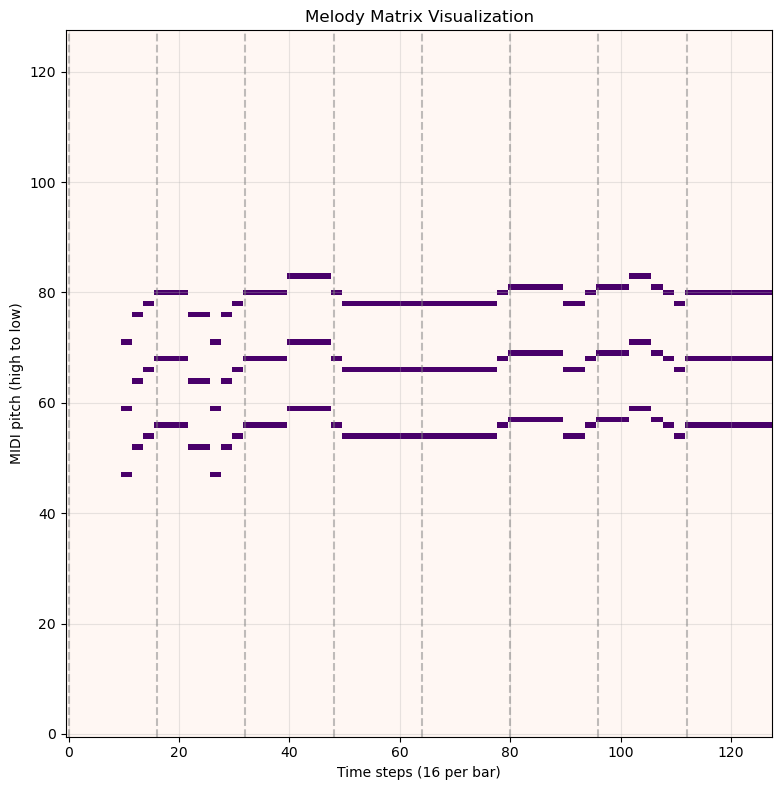

In [18]:
show_random_melody()

## Convert Polyphonic Melodies to Monophonic Lines

1. **Analysis Phase**
   - Calculate polyphony ratio (% of timesteps with multiple notes)
   - If highly polyphonic:
     - Create pitch histogram
     - Find highest significant peak
     - Define valid pitch range around peak

2. **Conversion Phase**
   - Process each timestep:
     - If one note: keep it
     - If multiple notes within range:
       - Keep previous note if present
       - Otherwise take highest note
     - Skip notes outside range (for highly polyphonic)

In [19]:
def convert_polyphonic_to_monophonic(
    input_dir: str = 'matrix_data',
    output_dir: str = 'monophonic_matrices',
    polyphony_threshold: float = 0.5,
    min_peak_height: int = 20,
    sigma_range: int = 4
) -> dict:
    """Extract highest melody line using two-phase approach."""
    
    os.makedirs(output_dir, exist_ok=True)
    stats = {'processed': 0, 'converted': 0}
    
    def analyze_polyphony(matrix):
        """Calculate percentage of polyphonic time steps."""
        polyphonic_steps = 0
        total_active_steps = 0
        
        for t in range(matrix.shape[1]):
            active_count = np.sum(matrix[:, t])
            if active_count > 0:
                total_active_steps += 1
                if active_count > 1:
                    polyphonic_steps += 1
                    
        if total_active_steps == 0:
            return 0
        return polyphonic_steps / total_active_steps
    
    def find_pitch_range(matrix):
        """Find pitch range around highest significant peak."""
        # Create pitch histogram
        pitch_counts = np.sum(matrix, axis=1)
        
        # Find peaks (local maxima)
        peaks = []
        for p in range(1, 127):
            if (pitch_counts[p] > pitch_counts[p-1] and 
                pitch_counts[p] > pitch_counts[p+1] and 
                pitch_counts[p] >= min_peak_height):
                peaks.append((p, pitch_counts[p]))
        
        if not peaks:
            return None, None
            
        # Get highest significant peak
        peak_pitch = max(peaks, key=lambda x: x[0])[0]
        
        # Define range around peak
        min_pitch = max(0, peak_pitch - sigma_range)
        max_pitch = min(127, peak_pitch + sigma_range)
        
        return min_pitch, max_pitch
    
    def process_timestep(active_pitches, last_pitch, pitch_range=None):
        """Process one time step to select single note."""
        if pitch_range:
            min_pitch, max_pitch = pitch_range
            active_pitches = active_pitches[
                (active_pitches >= min_pitch) & 
                (active_pitches <= max_pitch)
            ]
        
        if len(active_pitches) == 0:
            return None
        elif len(active_pitches) == 1:
            return active_pitches[0]
        elif last_pitch in active_pitches:
            return last_pitch
        else:
            return max(active_pitches)
    
    melody_files = [f for f in os.listdir(input_dir) 
                   if f.endswith('_melody.npy')]
    
    for file in tqdm(melody_files, desc="Converting matrices"):
        try:
            # Load matrix
            matrix_path = os.path.join(input_dir, file)
            matrix = np.load(matrix_path)
            
            # Analyze polyphony
            poly_ratio = analyze_polyphony(matrix)
            pitch_range = None
            
            # For highly polyphonic melodies, find pitch range
            if poly_ratio > polyphony_threshold:
                pitch_range = find_pitch_range(matrix)
                if pitch_range is None:
                    continue
            
            # Create monophonic version
            mono_matrix = np.zeros_like(matrix)
            last_pitch = None
            
            # Process each time step
            for t in range(matrix.shape[1]):
                active_pitches = np.where(matrix[:, t] == 1)[0]
                chosen_pitch = process_timestep(active_pitches, last_pitch, pitch_range)
                
                if chosen_pitch is not None:
                    mono_matrix[chosen_pitch, t] = 1
                    last_pitch = chosen_pitch
            
            # Save result
            output_path = os.path.join(output_dir, file)
            np.save(output_path, mono_matrix)
            stats['converted'] += 1
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
            continue
            
        stats['processed'] += 1
    
    print(f"\nConversion complete:")
    print(f"Files processed: {stats['processed']}")
    print(f"Successfully converted: {stats['converted']}")
    
    return stats

In [20]:
stats = convert_polyphonic_to_monophonic()

Converting matrices:   9%|▊         | 124/1429 [00:00<00:04, 284.77it/s]

Error processing All My Loving_segment2_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'
Error processing And I Love Her.3_segment5_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'


Converting matrices:  19%|█▊        | 267/1429 [00:00<00:04, 266.31it/s]

Error processing Chantilly Lace_segment3_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'
Error processing Davy's on the Road Again_segment0_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'
Error processing Day Tripper.4_segment0_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'


Converting matrices:  25%|██▍       | 352/1429 [00:01<00:04, 237.87it/s]

Error processing Dominated Love Slave_segment1_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'


Converting matrices:  46%|████▌     | 657/1429 [00:02<00:02, 332.14it/s]

Error processing I'm A Believer_segment1_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'
Error processing I'm A Believer_segment2_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'
Error processing It's My Life.1_segment2_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'


Converting matrices:  52%|█████▏    | 737/1429 [00:02<00:02, 331.15it/s]

Error processing Kiss You All Over_segment4_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'


Converting matrices:  80%|████████  | 1144/1429 [00:03<00:00, 398.72it/s]

Error processing Sleep Together_segment2_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'


Converting matrices:  86%|████████▌ | 1231/1429 [00:03<00:00, 416.03it/s]

Error processing The First the Last Eternity (Till the End)_segment0_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'
Error processing The Night Before.1_segment5_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'


Converting matrices:  92%|█████████▏| 1317/1429 [00:04<00:00, 408.71it/s]

Error processing Under The Boardwalk_segment4_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'
Error processing When the Going Gets Touch, the Touch Get Going.1_segment1_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'


Converting matrices: 100%|██████████| 1429/1429 [00:04<00:00, 322.27it/s]

Error processing Wings of an Eagle_segment3_melody.npy: '>=' not supported between instances of 'int' and 'NoneType'

Conversion complete:
Files processed: 1413
Successfully converted: 1413


Compare random melody before and after conversion

In [2]:
def compare_random_melody(matrix1_dir: str = 'matrix_data', matrix2_dir: str = 'monophonic_matrices'):
    """Compare random melody before and after a conversion."""
    
    # Get all melody files
    melody_files = [f for f in os.listdir(matrix1_dir) 
                   if f.endswith('_melody.npy')]
    
    if not melody_files:
        print("No melody matrices found")
        return
    
    # Select random file
    random_file = random.choice(melody_files)
    orig_path = os.path.join(matrix1_dir, random_file)
    mono_path = os.path.join(matrix2_dir, random_file)
    
    if not os.path.exists(mono_path):
        print(f"Processed version not found: {mono_path}")
        return
    
    # Create side-by-side plot
    plt.figure(figsize=(20, 8))
    
    # Original melody
    plt.subplot(121)
    matrix = np.load(orig_path)
    plt.imshow(matrix, cmap='RdPu', aspect='equal', 
              interpolation='nearest', origin='lower')
    plt.title('Original Melody')
    plt.xlabel('Time steps (16 per bar)')
    plt.ylabel('MIDI pitch')
    plt.grid(True, alpha=0.3)
    for x in range(0, 128, 16):
        plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5)
    
    # Processed melody
    plt.subplot(122)
    matrix = np.load(mono_path)
    plt.imshow(matrix, cmap='RdPu', aspect='equal', 
              interpolation='nearest', origin='lower')
    plt.title('Processed Melody')
    plt.xlabel('Time steps (16 per bar)')
    plt.ylabel('MIDI pitch')
    plt.grid(True, alpha=0.3)
    for x in range(0, 128, 16):
        plt.axvline(x=x, color='gray', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    print(f"Displaying: {random_file}")
    plt.show()

Displaying: Like A Rolling Stone.1_segment40_melody.npy


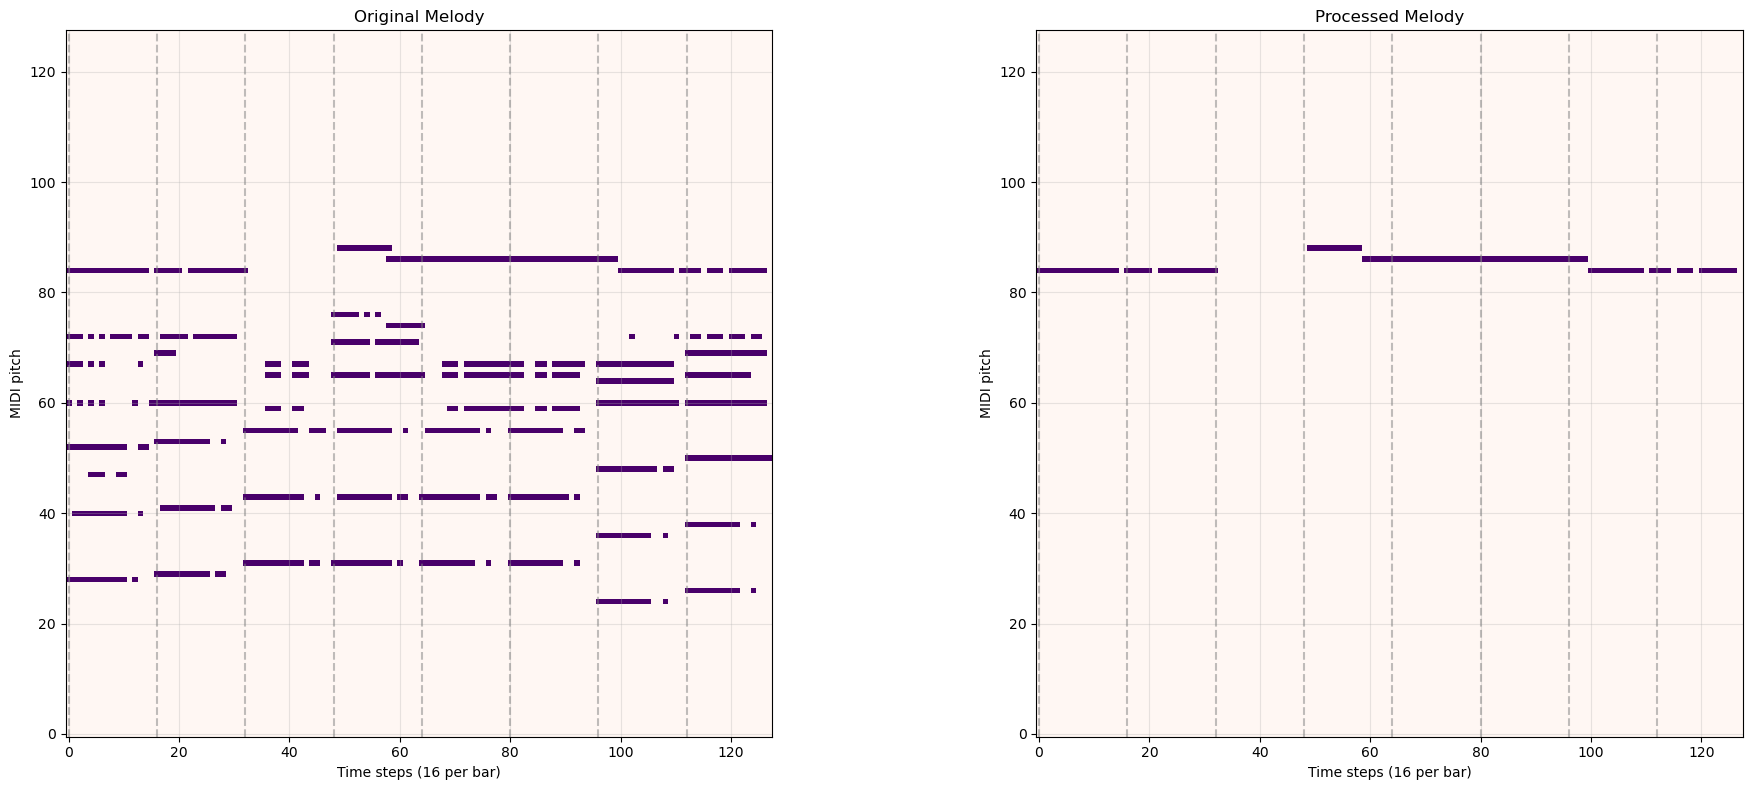

In [12]:
compare_random_melody()

Show a highly polyphonic melody before and after conversion

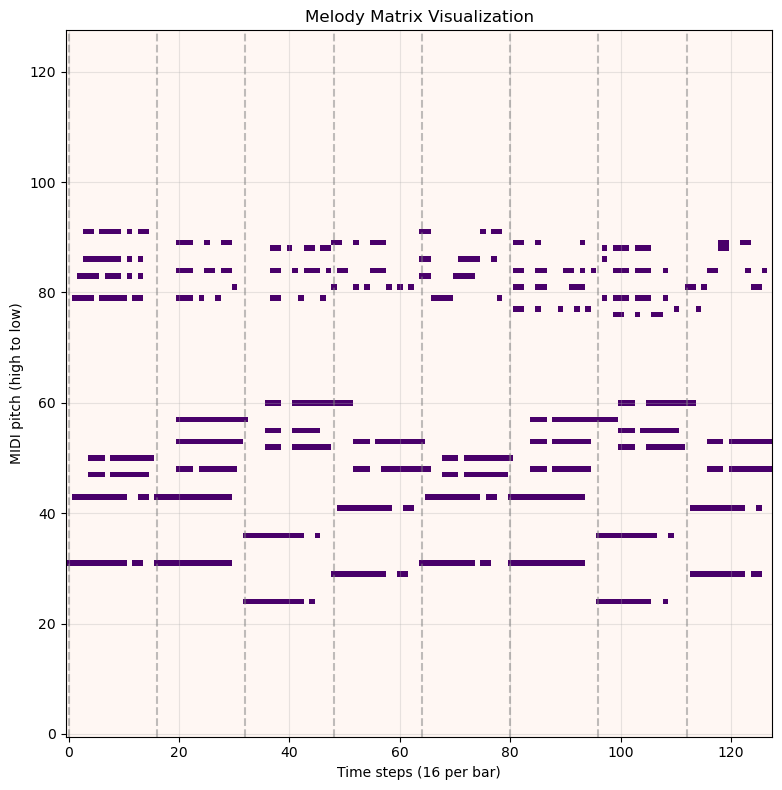

In [23]:
visualize_melody_matrix('matrix_data/Like A Rolling Stone.1_segment38_melody.npy')

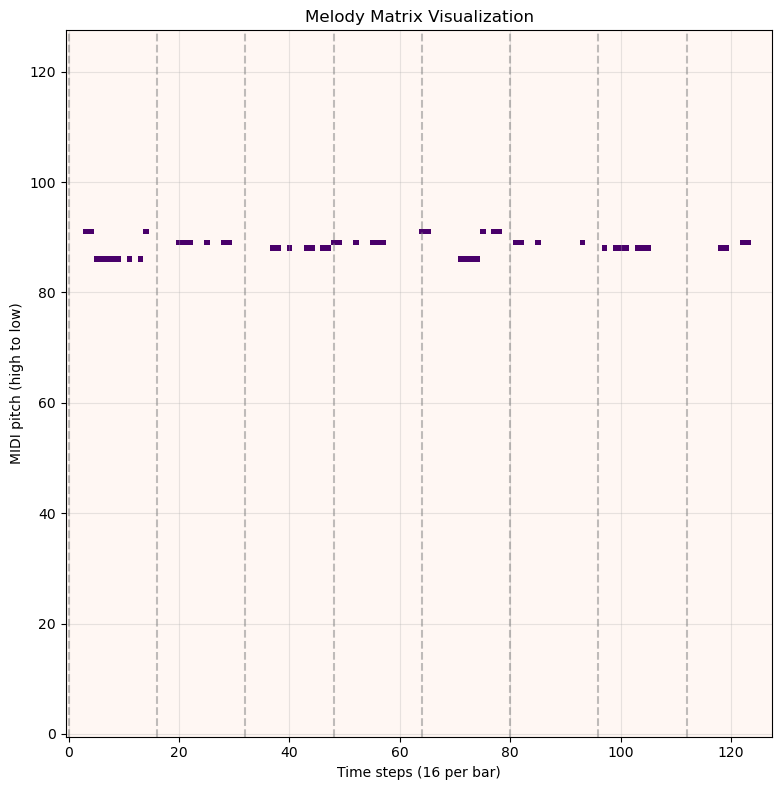

In [24]:
visualize_melody_matrix('monophonic_matrices/Like A Rolling Stone.1_segment38_melody.npy')

## Convert matrices to MIDI to check if they sound good

In [25]:
def matrix_to_midi(
    melody_matrix_file: str,
    input_melody_dir: str = 'monophonic_matrices',
    output_dir: str = 'reconstructed_midis',
    chord_dir: str = 'matrix_data_only_chords',
    tempo: int = 120
) -> None:
    """Convert melody matrix and chord vectors back to MIDI file."""
    
    os.makedirs(output_dir, exist_ok=True)
    
    def create_note(pitch, start, end, velocity=100):
        """Create a pretty_midi Note object."""
        note = pretty_midi.Note(
            velocity=velocity,
            pitch=pitch,
            start=start,
            end=end
        )
        return note
    
    def matrix_to_notes(matrix, ticks_per_step=0.125):
        """Convert matrix to list of MIDI notes."""
        notes = []
        
        # Find note starts and durations
        for pitch in range(128):
            note_on = False
            start_time = 0
            
            for step in range(128):
                current_time = step * ticks_per_step
                
                if matrix[pitch, step] == 1 and not note_on:
                    # Note starts
                    note_on = True
                    start_time = current_time
                elif (matrix[pitch, step] == 0 or step == 127) and note_on:
                    # Note ends
                    note_on = False
                    end_time = current_time
                    notes.append(create_note(pitch, start_time, end_time))
        
        return notes
    
    def vector_to_chord_notes(vector, bar, bar_duration):
        """Convert chord vector to MIDI notes."""
        notes = []
        start_time = bar * bar_duration
        end_time = start_time + bar_duration
        
        # Get root and quality
        is_minor = bool(vector[12])
        if is_minor:
            minor_map = {0:9, 1:10, 2:11, 3:0, 4:1, 5:2, 
                        6:3, 7:4, 8:5, 9:6, 10:7, 11:8}  # Reverse map
            root = minor_map[np.where(vector[:12] == 1)[0][0]]
            intervals = [0, 3, 7]  # Minor triad
        else:
            root = np.where(vector[:12] == 1)[0][0]
            intervals = [0, 4, 7]  # Major triad
            
        # Create chord notes
        base_pitch = 48 + root  # Start at C3
        for interval in intervals:
            notes.append(create_note(
                base_pitch + interval,
                start_time,
                end_time
            ))
            
        return notes

    try:
        # Load matrices
        melody_path = os.path.join(input_melody_dir, melody_matrix_file)
        chord_path = os.path.join(chord_dir, melody_matrix_file.replace('melody', 'chords'))
        
        melody_matrix = np.load(melody_path)
        chord_vectors = np.load(chord_path)
        
        # Create MIDI file
        midi = pretty_midi.PrettyMIDI(initial_tempo=tempo)
        
        # Add melody track
        melody_program = pretty_midi.instrument_name_to_program('Acoustic Grand Piano')
        melody_track = pretty_midi.Instrument(program=melody_program)
        melody_track.notes = matrix_to_notes(melody_matrix)
        midi.instruments.append(melody_track)
        
        # Add chord track
        chord_program = pretty_midi.instrument_name_to_program('Acoustic Grand Piano')
        chord_track = pretty_midi.Instrument(program=chord_program)
        bar_duration = 2.0  # 2 seconds per bar at 120 BPM
        
        for bar, vector in enumerate(chord_vectors):
            chord_track.notes.extend(vector_to_chord_notes(vector, bar, bar_duration))
        
        midi.instruments.append(chord_track)
        
        # Save MIDI file
        output_name = melody_matrix_file.replace('_melody.npy', '.mid')
        output_path = os.path.join(output_dir, output_name)
        midi.write(output_path)
        
        print(f"MIDI file saved: {output_path}")
        
    except Exception as e:
        print(f"Error processing {melody_matrix_file}: {str(e)}")

In [26]:
matrix_to_midi("Like A Rolling Stone.1_segment38_melody.npy")

MIDI file saved: reconstructed_midis\Like A Rolling Stone.1_segment38.mid


## Filter Segments with Sufficient Melody Notes

Ensure melody duration exceeds 50% of the segment.

In [27]:
def collect_dense_melodies(
    input_dir: str = 'monophonic_matrices',
    output_pickle: str = 'dense_melodies.pickle',
    density_threshold: float = 0.5  # At least 50% of timesteps have notes
) -> dict:
    """Collect melodies that meet minimum density requirement."""
    
    stats = {'total': 0, 'selected': 0}
    dense_melodies = []
    
    # Get all melody files
    melody_files = [f for f in os.listdir(input_dir) 
                   if f.endswith('_melody.npy')]
    
    for file in tqdm(melody_files, desc="Processing matrices"):
        try:
            # Load matrix
            matrix_path = os.path.join(input_dir, file)
            matrix = np.load(matrix_path)
            
            # Calculate density
            note_count = np.sum(matrix)
            density = note_count / 128  # Divide by timesteps
            
            # Check if dense enough
            if density >= density_threshold:
                dense_melodies.append({
                    'file': file,
                    'matrix': matrix,
                    'density': density
                })
                stats['selected'] += 1
                
            stats['total'] += 1
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
            continue
    
    # Save results
    with open(output_pickle, 'wb') as f:
        pickle.dump(dense_melodies, f)
    
    print(f"\nProcessing complete:")
    print(f"Total matrices: {stats['total']}")
    print(f"Selected matrices: {stats['selected']}")
    print(f"Selection rate: {stats['selected']/stats['total']*100:.1f}%")
    print(f"Results saved to: {output_pickle}")
    
    return stats

In [28]:
stats = collect_dense_melodies()

Processing matrices: 100%|██████████| 1413/1413 [00:00<00:00, 3413.08it/s]



Processing complete:
Total matrices: 1413
Selected matrices: 1004
Selection rate: 71.1%
Results saved to: dense_melodies.pickle


## Shift melodies in the range C4 - B5

1. **Range Analysis**:
   - Find lowest/highest notes in melody
   - Skip if range > 24 semitones (too wide)
2. **Pitch Shifting**:
   - Calculate required shift to center melody in C4-B5
   - Apply vertical shift to melody matrix
   - Apply circular shift to chord roots
3. **Output**: 
   - Save normalized melody matrices
   - Save transposed chord vectors

In [29]:
def normalize_pitch_range(
    input_melody_dir: str = 'monophonic_matrices',
    input_chord_dir: str = 'matrix_data_only_chords',
    output_dir: str = 'normalized_matrices',
    dense_melodies_pickle: str = 'dense_melodies.pickle',
    min_pitch: int = 60,  # C4
    max_pitch: int = 83   # B5
) -> dict:
    """Normalize melodies to C4-B5 range and shift chords accordingly."""
    
    os.makedirs(output_dir, exist_ok=True)
    stats = {'processed': 0, 'normalized': 0, 'skipped_range': 0}
    
    # Load dense melodies list
    with open(dense_melodies_pickle, 'rb') as f:
        dense_melodies = pickle.load(f)
    dense_files = set(item['file'] for item in dense_melodies)
    
    def get_melody_range(matrix):
        """Get lowest and highest pitches in melody."""
        active_pitches = []
        for pitch in range(128):
            if np.any(matrix[pitch]):
                active_pitches.append(pitch)
        if not active_pitches:
            return None, None
        return min(active_pitches), max(active_pitches)
    
    def shift_melody(matrix, shift):
        """Shift melody matrix up/down by given amount."""
        if shift > 0:
            # Shift up
            new_matrix = np.zeros_like(matrix)
            new_matrix[shift:] = matrix[:-shift]
            return new_matrix
        elif shift < 0:
            # Shift down
            new_matrix = np.zeros_like(matrix)
            new_matrix[:shift] = matrix[-shift:]
            return new_matrix
        return matrix
    
    def shift_chord_vector(vector, shift):
        """Shift chord root with circular shift, preserving minor flag."""
        new_vector = np.zeros_like(vector)
        # Keep minor flag (last element) unchanged
        new_vector[12] = vector[12]
        
        # Find position of 1 in first 12 elements
        root = np.where(vector[:12] == 1)[0][0]
        # Apply circular shift
        new_root = (root + shift) % 12
        new_vector[new_root] = 1
        
        return new_vector
    
    # Filter melody files to only include dense ones
    melody_files = [f for f in os.listdir(input_melody_dir) 
                   if f.endswith('_melody.npy') and f in dense_files]
    
    for file in tqdm(melody_files, desc="Processing melodies"):
        try:
            # Load melody matrix
            melody_path = os.path.join(input_melody_dir, file)
            melody_matrix = np.load(melody_path)
            
            # Get melody range
            low_pitch, high_pitch = get_melody_range(melody_matrix)
            if low_pitch is None:
                continue
                
            # Check if range is too wide
            if high_pitch - low_pitch > 24:
                stats['skipped_range'] += 1
                continue
            
            # Calculate required shift
            target_center = (min_pitch + max_pitch) // 2
            current_center = (low_pitch + high_pitch) // 2
            shift = target_center - current_center
            
            # Apply shift to melody
            shifted_melody = shift_melody(melody_matrix, shift)
            
            # Load and shift chord vectors
            chord_path = os.path.join(input_chord_dir, 
                                    file.replace('melody', 'chords'))
            chord_vectors = np.load(chord_path)
            shifted_chords = np.array([shift_chord_vector(v, shift) 
                                     for v in chord_vectors])
            
            # Save normalized matrices
            np.save(os.path.join(output_dir, file), shifted_melody)
            np.save(os.path.join(output_dir, file.replace('melody', 'chords')), 
                   shifted_chords)
            
            stats['normalized'] += 1
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
            continue
            
        stats['processed'] += 1
    
    print(f"\nNormalization complete:")
    print(f"Files processed: {stats['processed']}")
    print(f"Successfully normalized: {stats['normalized']}")
    print(f"Skipped (range too wide): {stats['skipped_range']}")
    
    return stats

In [30]:
stats = normalize_pitch_range()

Processing melodies: 100%|██████████| 1004/1004 [00:04<00:00, 227.86it/s]


Normalization complete:
Files processed: 987
Successfully normalized: 987
Skipped (range too wide): 17


Visualize random melody before and after normalization

Displaying: Mockingbird_segment1_melody.npy


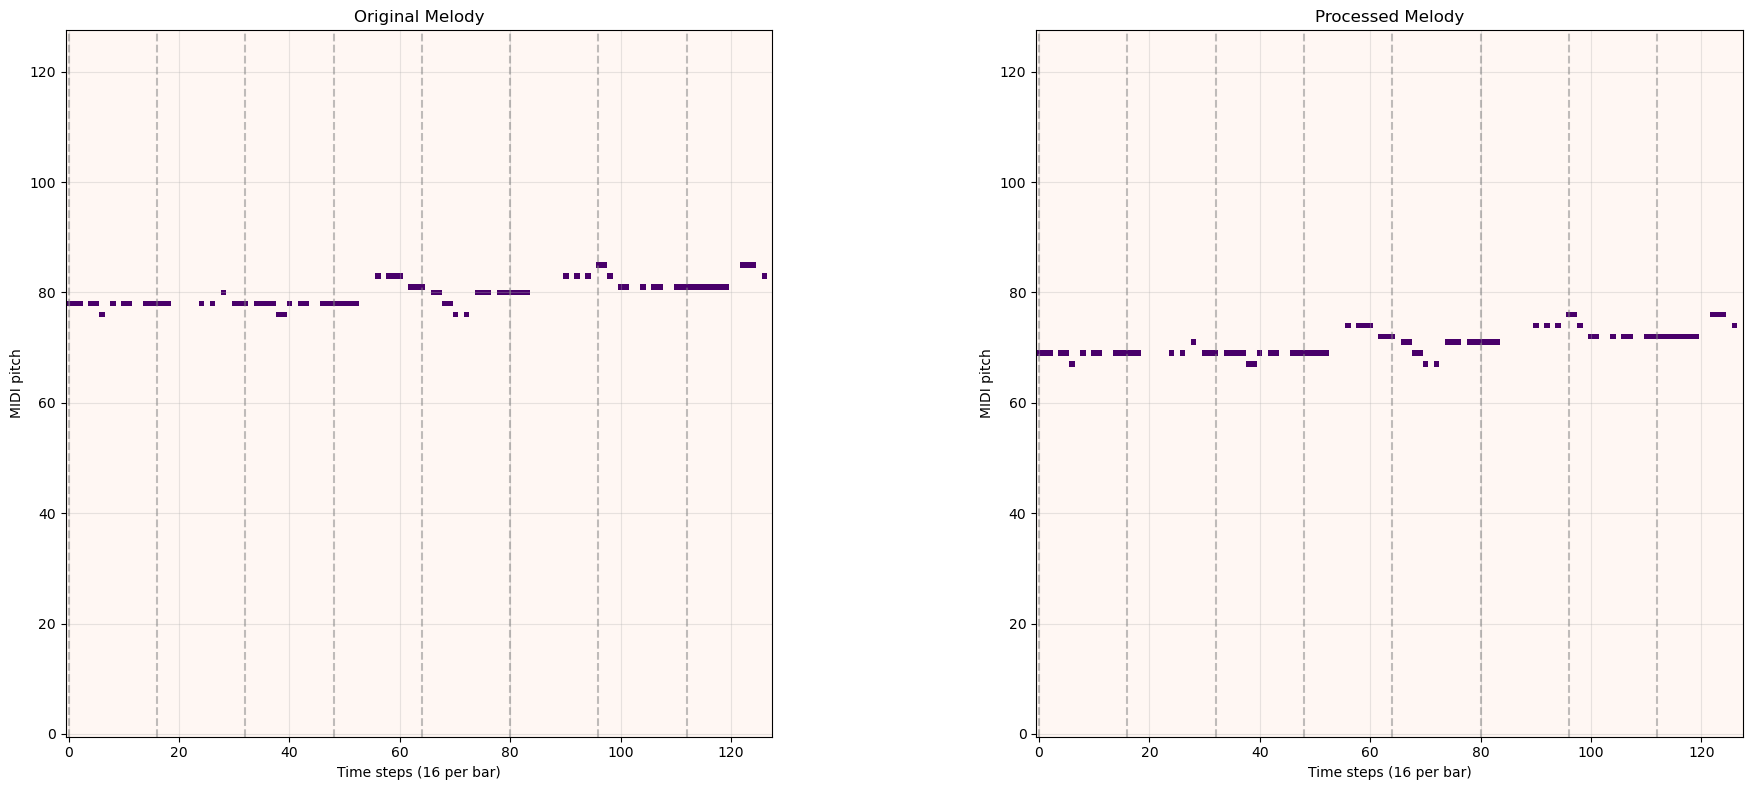

In [13]:
compare_random_melody('monophonic_matrices', 'normalized_matrices')

## Remove pauses in melodies

Eliminate silent gaps in melody lines by extending notes

In [36]:
def remove_melody_pauses(
    input_dir: str = 'normalized_matrices',
    output_dir: str = 'no_pauses_matrices'
) -> dict:
    """Remove pauses from melody matrices while keeping chords unchanged."""
    
    os.makedirs(output_dir, exist_ok=True)
    stats = {'processed': 0, 'modified': 0}
    
    def fill_melody_gaps(matrix):
        """Fill pauses in melody matrix by extending notes."""
        new_matrix = np.zeros_like(matrix)
        
        # Handle initial pause by extending first note backwards
        first_note_step = None
        first_note_pitch = None
        for t in range(128):
            active_notes = np.where(matrix[:, t] == 1)[0]
            if len(active_notes) > 0:
                first_note_step = t
                first_note_pitch = active_notes[0]
                break
        
        if first_note_step is not None and first_note_step > 0:
            new_matrix[first_note_pitch, 0:first_note_step] = 1
        
        # Process each timestep
        last_pitch = first_note_pitch
        for t in range(128):
            active_notes = np.where(matrix[:, t] == 1)[0]
            if len(active_notes) > 0:
                # Copy current notes
                new_matrix[:, t] = matrix[:, t]
                last_pitch = active_notes[0]
            elif last_pitch is not None:
                # Fill pause with last note
                new_matrix[last_pitch, t] = 1
        
        return new_matrix
    
    # Get all melody files
    melody_files = [f for f in os.listdir(input_dir) 
                   if f.endswith('_melody.npy')]
    
    for file in tqdm(melody_files, desc="Processing melodies"):
        try:
            # Load melody matrix
            melody_path = os.path.join(input_dir, file)
            melody_matrix = np.load(melody_path)
            
            # Remove pauses
            modified_melody = fill_melody_gaps(melody_matrix)
            
            # Load chord matrix (unchanged)
            chord_file = file.replace('melody', 'chords')
            chord_path = os.path.join(input_dir, chord_file)
            chord_matrix = np.load(chord_path)
            
            # Save both matrices
            np.save(os.path.join(output_dir, file), modified_melody)
            np.save(os.path.join(output_dir, chord_file), chord_matrix)
            
            stats['modified'] += 1
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
            continue
            
        stats['processed'] += 1
    
    print(f"\nProcessing complete:")
    print(f"Files processed: {stats['processed']}")
    print(f"Successfully modified: {stats['modified']}")
    
    return stats

In [37]:
stats = remove_melody_pauses()

Processing melodies: 100%|██████████| 987/987 [00:02<00:00, 380.00it/s]


Processing complete:
Files processed: 987
Successfully modified: 987


Compare original and modified melody with no pauses

Displaying: (Sitin' on) The Dock of the Bay.1_segment2_melody.npy


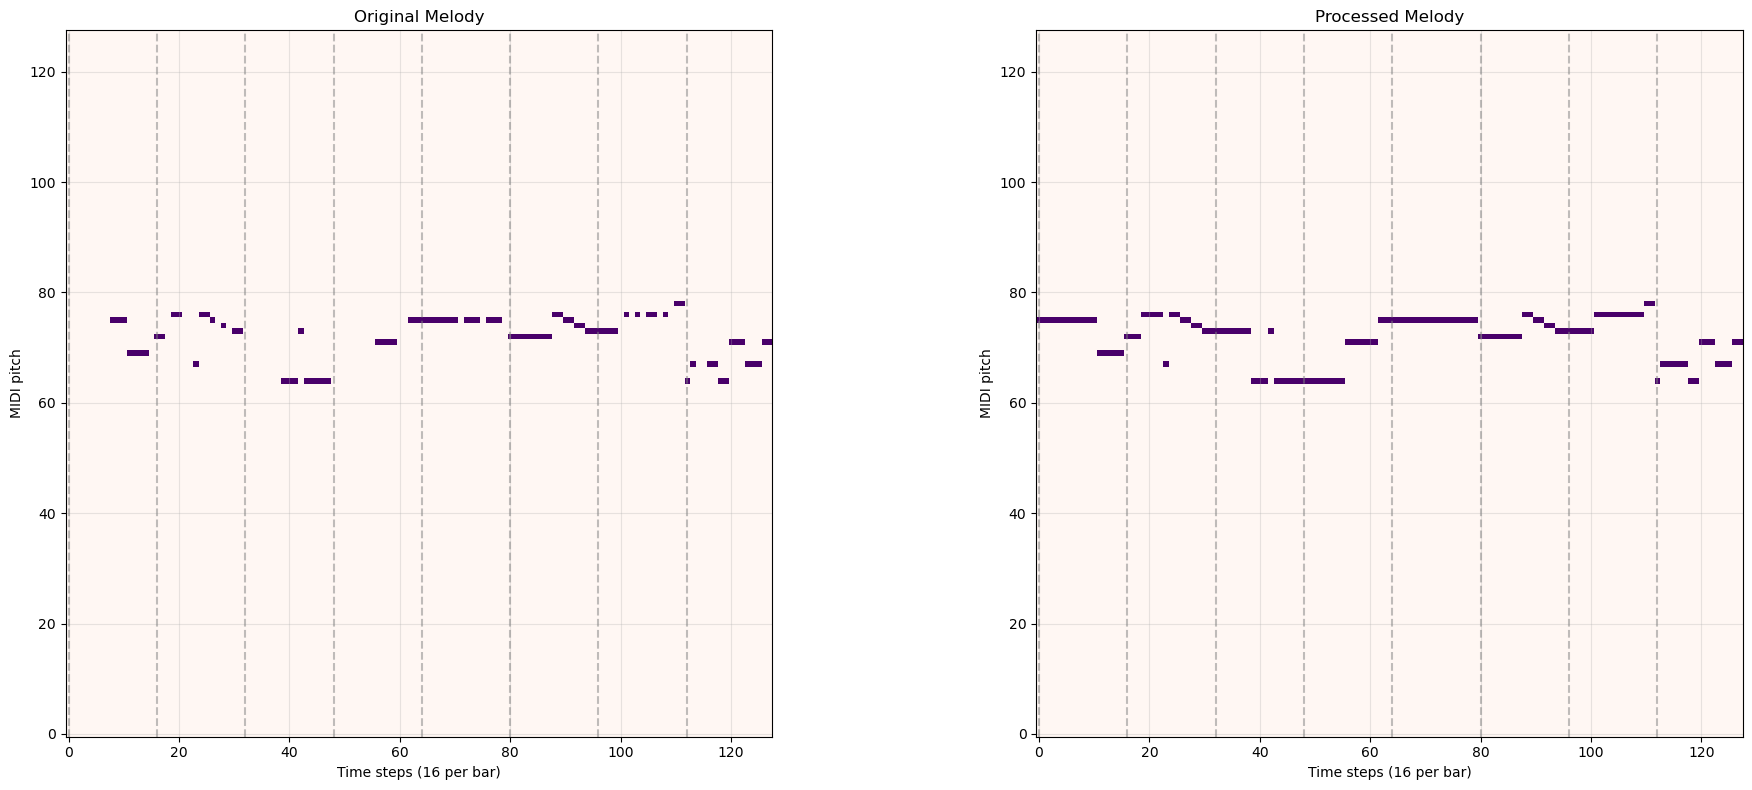

In [17]:
compare_random_melody('normalized_matrices', 'no_pauses_matrices')

### Add Explicit Silence Markers

Add an extra row (129th) that explicitly marks silent timesteps, creating a 129x128 matrix format.

   - Set row 129 to 1 where no notes play

In [3]:
def add_silence_row(
    input_dir: str = 'normalized_matrices',
    output_dir: str = 'silence_matrices'
) -> dict:
    """Add explicit silence row to melody matrices."""
    
    os.makedirs(output_dir, exist_ok=True)
    stats = {'processed': 0, 'modified': 0}
    
    def add_silence_marker(matrix):
        """Add row 129 marking silent timesteps."""
        # Create new matrix with extra row
        new_matrix = np.zeros((129, 128))
        # Copy original content
        new_matrix[:128, :] = matrix
        
        # Mark silent timesteps in last row
        for t in range(128):
            if np.sum(matrix[:, t]) == 0:
                new_matrix[128, t] = 1
                
        return new_matrix
    
    # Get all melody files
    melody_files = [f for f in os.listdir(input_dir) 
                   if f.endswith('_melody.npy')]
    
    for file in tqdm(melody_files, desc="Processing melodies"):
        try:
            # Load melody matrix
            melody_path = os.path.join(input_dir, file)
            melody_matrix = np.load(melody_path)
            
            # Add silence row
            modified_melody = add_silence_marker(melody_matrix)
            
            # Load chord matrix (unchanged)
            chord_file = file.replace('melody', 'chords')
            chord_path = os.path.join(input_dir, chord_file)
            chord_matrix = np.load(chord_path)
            
            # Save both matrices
            np.save(os.path.join(output_dir, file), modified_melody)
            np.save(os.path.join(output_dir, chord_file), chord_matrix)
            
            stats['modified'] += 1
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
            continue
            
        stats['processed'] += 1
    
    print(f"\nProcessing complete:")
    print(f"Files processed: {stats['processed']}")
    print(f"Successfully modified: {stats['modified']}")
    
    return stats

In [4]:
stats = add_silence_row()

Processing melodies: 100%|██████████| 987/987 [00:04<00:00, 208.99it/s]


Processing complete:
Files processed: 987
Successfully modified: 987


Displaying: Hotel California.4_segment4_melody.npy


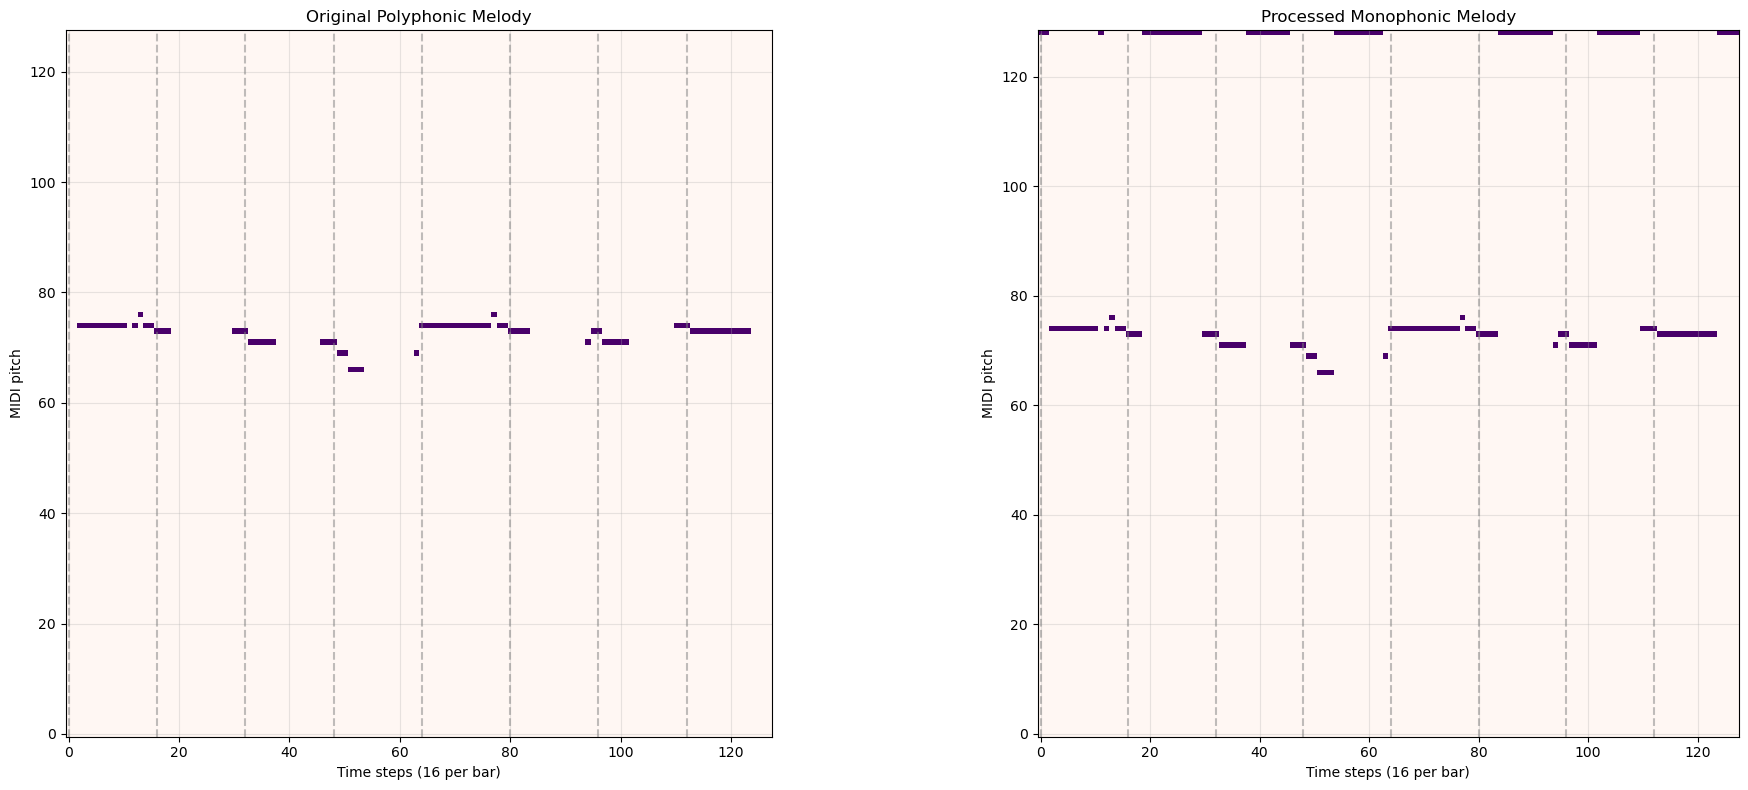

In [5]:
compare_random_melody('normalized_matrices', 'silence_matrices')